# Resampling Datetime Data

## Libraries

In [1]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

## Dataframe

In [2]:
filename = 'Data\london_weather_MODIFIED - london_weather_MODIFIED.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Making a date/time index

In [3]:
now = dt.datetime.now()
now

datetime.datetime(2023, 6, 8, 19, 10, 21, 136755)

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(9)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03


In [6]:
df = df.set_index('datetime')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


## Filtering Data

### Droping Unneeded Columns

In [7]:
df = df.drop(columns=['date', 'cloud_cover', 'sunshine', 'global_radiation', 'pressure'])
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
1979-01-01,2.3,-4.1,-7.5,0.4,9.0
1979-01-02,1.6,-2.6,-7.5,0.0,8.0
1979-01-03,1.3,-2.8,-7.2,0.0,4.0
1979-01-04,-0.3,-2.6,-6.5,0.0,2.0
1979-01-05,5.6,-0.8,-1.4,0.0,1.0


### Flitering for Just 2000 or Later

In [8]:
df = df.loc['2000':'2023']
df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


### Dealing with Missing Data

In [9]:
df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

So prior to looking at the amount of data is missing through out, I had intended to put snow depth at 0 while using the mean for everything else, however due to the volume of that missing data, just assuming there to be no snow felt incorrect and would effect far too much data. At least using the mean it's closer to being potentially accurate

In [10]:
df_means = df.mean()
df_means

max_temp         15.810850
mean_temp        11.907308
min_temp          8.000480
precipitation     1.723376
snow_depth        0.023146
dtype: float64

In [11]:
df = df.fillna(df_means)
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

In [12]:
df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.000000
2000-01-02,11.5,7.9,5.0,0.2,0.000000
2000-01-03,9.5,9.4,7.2,6.0,0.000000
2000-01-04,11.0,7.0,4.4,0.2,0.000000
2000-01-05,10.8,6.4,1.9,0.8,0.000000
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.023146
2020-12-28,3.6,1.1,-1.3,0.2,0.023146
2020-12-29,4.1,2.6,1.1,0.0,0.023146


##  Questions with Visualizations

### What month had the most precipitation between 2000 through 2010?

#### Coding to find the answer and create the visual

In [13]:
dfq1 = df.loc['2000':'2010']
dfq1

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.000000
2000-01-02,11.5,7.9,5.0,0.2,0.000000
2000-01-03,9.5,9.4,7.2,6.0,0.000000
2000-01-04,11.0,7.0,4.4,0.2,0.000000
2000-01-05,10.8,6.4,1.9,0.8,0.000000
...,...,...,...,...,...
2010-12-27,8.0,0.2,-4.6,5.0,1.000000
2010-12-28,9.5,5.3,2.5,0.4,0.000000
2010-12-29,7.7,6.8,4.1,1.4,0.000000


In [14]:
ts = dfq1['precipitation'].copy()
ts

datetime
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [15]:
max_date = ts.idxmax()
max_date

Timestamp('2000-10-29 00:00:00')

#### Final Answer and Visualizations

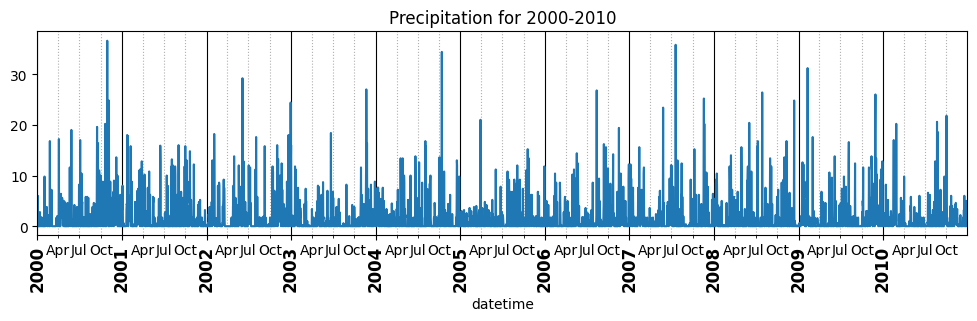

In [25]:
def plot_dates(ts,figsize=(12,3),xtick_fontsize='large', xtick_fontweight='bold',
               title= "Precipitation for 2000-2010"):
          
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    

    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

The month that had the most precipitation 2000 to 2010 is October 2000 as you see looking at the visual as well as from looking through the data as well

### Which year between 2000-2020 had the coolest average temperature?

#### Narrowing Down the Data

In [17]:
dfq2 = df.loc['2000':'2020']
dfq2

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.000000
2000-01-02,11.5,7.9,5.0,0.2,0.000000
2000-01-03,9.5,9.4,7.2,6.0,0.000000
2000-01-04,11.0,7.0,4.4,0.2,0.000000
2000-01-05,10.8,6.4,1.9,0.8,0.000000
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.023146
2020-12-28,3.6,1.1,-1.3,0.2,0.023146
2020-12-29,4.1,2.6,1.1,0.0,0.023146


In [26]:
ts = dfq2['mean_temp'].copy()
ts

datetime
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [27]:
min_date = ts.idxmin()
min_date

Timestamp('2010-12-20 00:00:00')

#### Final Answer and Visualizations

TypeError: YearLocator.__init__() got an unexpected keyword argument 'interval'

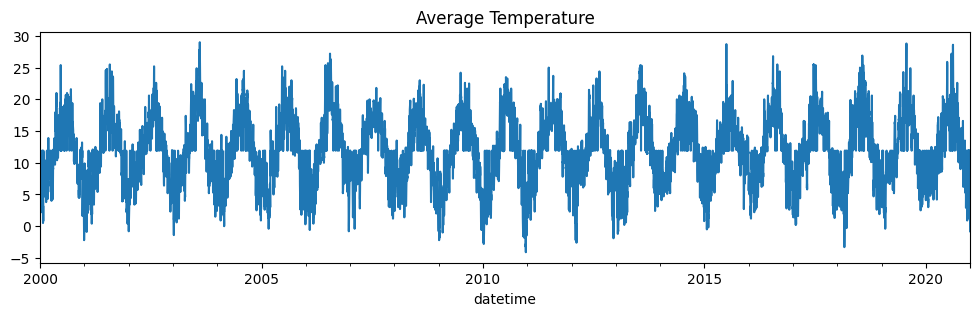

In [28]:
def plot_dates(ts,figsize=(12,3),xtick_fontsize='large', xtick_fontweight='bold',
               title= "Average Temperature"):
          
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    loc_year5 = mdates.YearLocator(interval=5)
    fmt_year5 = mdates.DateFormatter("%Y")
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    

    ax.xaxis.set_minor_locator(loc_year)
    ax.xaxis.set_minor_formatter(fmt_year)
    
    ax.xaxis.set_major_locator(loc_year5)
    ax.xaxis.set_major_formatter(fmt_year5)
    
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);